<a href="https://colab.research.google.com/github/Alex-AI-code/PRA3024/blob/main/ML_MNIST_NN_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load training and test images (x), and their respective classified labels (y).
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Investigate the data

print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28
print("First 10 training labels as digits:\n", y_train[:10])
print("")


Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
First 10 training labels as digits:
 [5 0 4 1 9 2 1 3 1 4]



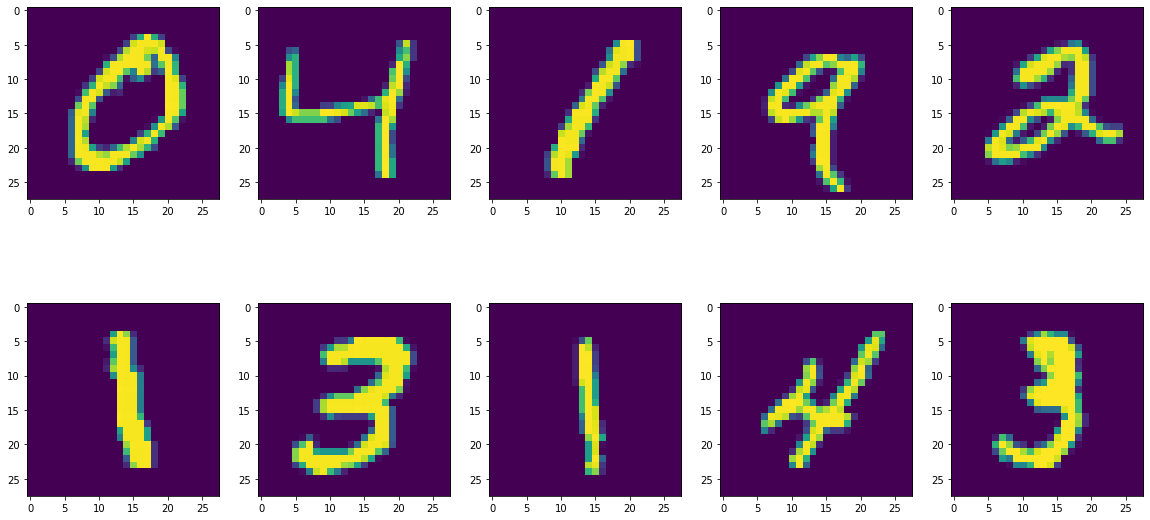

In [4]:
# Plot the first 10 images

w=30
h=15
fig=plt.figure(figsize=(20, 10))
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train[i])
plt.show()

### --> Find a way to plot a sample of 10 images of hand-written digits in the training data
### END STUDENT CODE ###

In [5]:
# Pre-processing of data

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
print("reshaped training data format: ", x_train.shape) # -- 60000 images, now flat arrays of 28*28 long

# one-hot encode the labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 10 training lables as one-hot encoded vectors:\n", y_train[:10])

reshaped training data format:  (60000, 784)
First 10 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [6]:
# Build the network
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/
from keras.layers import Dropout


callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)


model = Sequential()

model.add(Dense(128, activation="relu", input_shape=[28*28]))
model.add(Dense(128, activation="relu",name="hidden_layer"))
model.add(Dropout(0.1, name="dropout_out"))
model.add(Dense(10, activation="softmax"))


model.compile(optimizer=keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# The input layer requires the special input_shape parameter, which should equal the shape of our training data.
# The output layer must be the same size as the (one-hot encoded) labels.
# Choose a non-linear activation function such as a sigmoid, or relu.
# For classification purposes, where the outputs are normalized 'probabilities' between the classes,
#  one typically uses the softmax activation function for the last layer.

### STUDENT CODE HERE ###
### --> add Dense (fully connected) layers to the model to connect input to output, using model.add().
###  Make sure that the dimensionality is correct: input should be # pixels large, 
###  output should be #classes large. Google is your friend.
### END STUDENT CODE ###

# Print model summary. Shows network layout, and # free parameters (weights + biases) to adapt while learning.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
hidden_layer (Dense)         (None, 128)               16512     
_________________________________________________________________
dropout_out (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Compile the model

# A good loss function for probability classification that works well with softmax is the 'categorical crossentropy'.
#  It's a function of the difference between the predicted y (from running the image through the network),
#  and the actual label y that we get from the dataset. The larger the loss, the worst our network is performing.
# A good optimizer is the stochastic gradient descent (sgd) or adam.

### STUDENT CODE HERE ###
### --> Call model.compile with the right arguments.
### END STUDENT CODE ###

In [8]:
# Let's see how good the model 'predicts' some hand-written digits in our test dataset, without training.
# It's probably random: so for 10 digits, it should get an accuracy around 0.1 .

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

y_pred_test = model.predict_proba(x_test)

### STUDENT CODE HERE ###
### --> call model.predict_proba() on the test images, and show the predictions of the
###  untrained model for the first 10 images. Also, plot those images, as you did above.
### END STUDENT CODE ###

Test loss: 84.2
Test accuracy: 0.114


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [9]:
# Train the model.

# BATCH_SIZE defines how many images to process at once.
# EPOCHS defines how often to run over the total data (60000 images)
# (Note that a small part of the train data is internally split off for independent validation of the metrics)

### STUDENT CODE HERE ###
### --> Edit the parameters below to obtain a better accuracy in the training.

BATCH_SIZE = 850
EPOCHS = 50

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, callbacks=[callback], epochs=EPOCHS, verbose=1, validation_split=.1)

Epoch 1/50
64/64 [==============================] - 2s 17ms/step - loss: 9.0147 - accuracy: 0.7373 - val_loss: 1.3876 - val_accuracy: 0.8925
Epoch 2/50
64/64 [==============================] - 1s 12ms/step - loss: 1.3806 - accuracy: 0.8618 - val_loss: 0.7942 - val_accuracy: 0.9045
Epoch 3/50
64/64 [==============================] - 1s 12ms/step - loss: 0.7839 - accuracy: 0.8737 - val_loss: 0.5714 - val_accuracy: 0.9063
Epoch 4/50
64/64 [==============================] - 1s 12ms/step - loss: 0.5444 - accuracy: 0.8898 - val_loss: 0.4333 - val_accuracy: 0.9163
Epoch 5/50
64/64 [==============================] - 1s 12ms/step - loss: 0.4205 - accuracy: 0.9058 - val_loss: 0.3821 - val_accuracy: 0.9217
Epoch 6/50
64/64 [==============================] - 1s 13ms/step - loss: 0.3356 - accuracy: 0.9197 - val_loss: 0.3306 - val_accuracy: 0.9333
Epoch 7/50
64/64 [==============================] - 1s 12ms/step - loss: 0.2842 - accuracy: 0.9281 - val_loss: 0.3132 - val_accuracy: 0.9360
Epoch 8/50
64

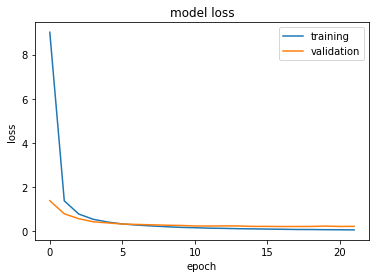

In [10]:
# Plot the progression of the training loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

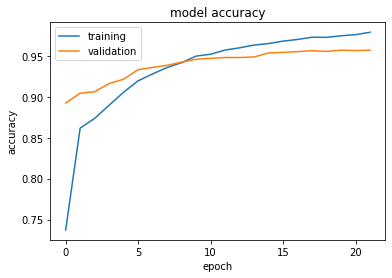

In [11]:
# Plot the progression of the training accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

Test loss: 0.294
Test accuracy: 0.951


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


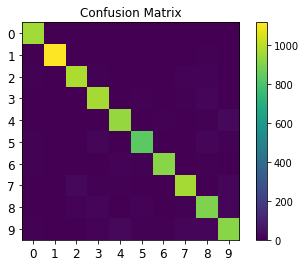

In [12]:
# Evaluate model on test data - how often does the network predict the right label after training?

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Make a confusion matrix to see which numbers are difficult to disentangle

y_pred_test = model.predict_proba(x_test) # obtain one-hot encoded predictions for the x_test images
y_test_index      = [ np.argmax(i) for i in y_test ] # actual number known labels
y_pred_test_index = [ np.argmax(i) for i in y_pred_test ] # actual number predictions
y_pred_test_proba = [ y_pred_test[i][ y_pred_test_index[i] ] for i in range(len(y_test_index)) ] # probabilities to be correct

from sklearn.metrics import confusion_matrix
### STUDENT CODE HERE ###
### --> Now predict again the labels for the test images, but after proper training.
###  Build a confusion matrix to show which labels we often confuse with what.
###  (Note that the y_test and y_pred are still one-hot encoded, so you need to get
###   the index of the maximum entry to find the corresponding predicted 'number'.
### END STUDENT CODE ###



plt.title("Confusion Matrix")
plt.imshow(confusion_matrix(y_test_index, y_pred_test_index ))
plt.xticks(np.arange(10), np.arange(10), rotation=0, fontsize=12)
plt.yticks(np.arange(10), np.arange(10), fontsize=12)
plt.colorbar()
plt.show()

In [13]:
# Show some predicted labels and their probabilities to be correct

### STUDENT CODE HERE ###
### --> Now show some hand-written digit images from the test sample, 
###  their corresponding true label, their predicted label from your network,
###  and the probability associated with that prediction.
### END STUDENT CODE ###

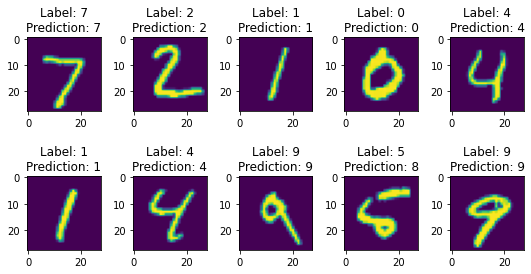

In [14]:
fig, axes = plt.subplots(rows, columns, figsize=(1.5*columns,2*rows))

for i in range(10):
  ax = axes[i//columns, i%columns]
  #reshape the data to
  ax.imshow(x_test[i].reshape(28,28))
  ax.set_title('Label: {}\nPrediction: {}'.format(np.argmax(y_test[i]),np.argmax(y_pred_test[i])))

plt.tight_layout()
plt.show()

In [15]:
def plot_image(i):
  plt.imshow(x_test[i].reshape(28,28))


In [100]:
def plot_value_array(x):
  Y = y_pred_test[x]
  X = range(len(y_pred_test[x]))
  plt.bar(X,Y)
  plt.xticks(range(10))
  plt.yticks(np.arange(0.0, 1.1, 0.1))

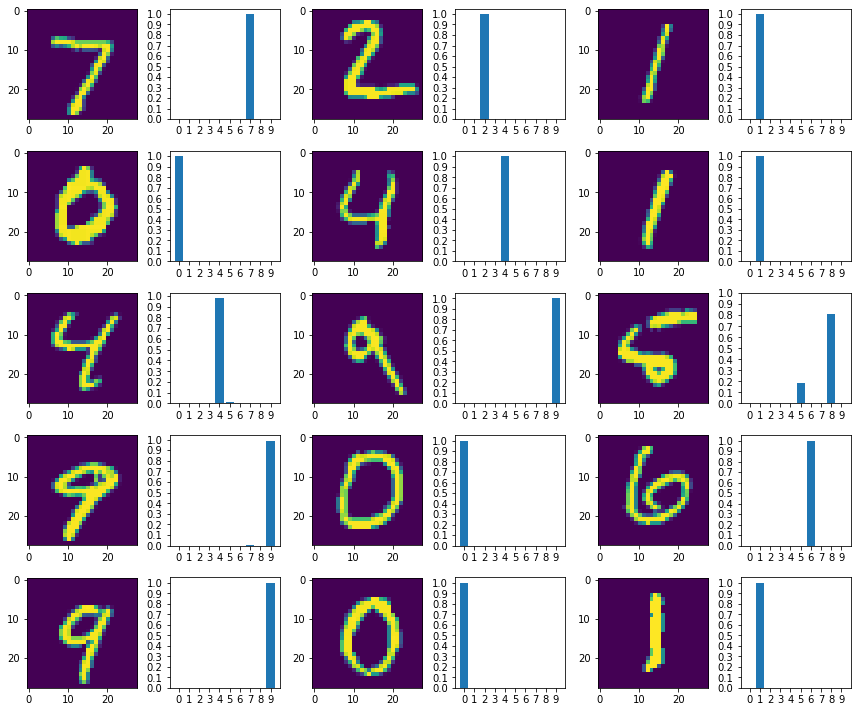

In [101]:
# Plot the first X test images, their predicted labels, and the true #labels.
# Color correct predictions in blue and incorrect predictions in #red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i)
plt.tight_layout()
plt.show()